In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import spated

# Limit borders

In [2]:
# initial map used as max borders
max_borders = gpd.read_file(r'data\rio_de_janeiro_fullmap')
print(type(max_borders))
max_borders

<class 'geopandas.geodataframe.GeoDataFrame'>


,OBJECTID_1,OBJECTID,MUN,SHAPE_LENG,SHAPESTAre,SHAPESTLen,geometry
0,2,None,None,None,1.204148e+09,375647.256369,"MULTIPOLYGON (((682113.651 7469305.612, 682113..."


<AxesSubplot:>

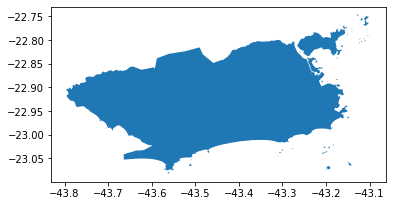

In [3]:
app = spated.DataAggregator(crs='epsg:4326') # epsg:29193
app.add_max_borders(max_borders)

app.max_borders.plot()

# Events data

In [4]:
# events data
events = pd.read_csv(r'data\ambulance_calls.csv', index_col=0)
events = events.sample(1000).copy()
events.head()

,data_idx,Prioridade,TotalViaturas,latitude,longitude,data,hora,TipoViatura,Coordenadas
252567,3/3/17 19:18,0,1,-22.893428,-43.537408,3/3/17,19:18:08,1,POINT (-43.537408 -22.893428)
69526,4/8/16 16:57,2,0,-22.911070,-43.588962,4/8/16,16:57:05,1,POINT (-43.588962 -22.91107)
384003,12/5/17 22:33,3,0,-22.967972,-43.335925,12/5/17,22:33:47,0,POINT (-43.335925 -22.967972)
177111,10/12/16 16:37,1,1,-23.001355,-43.638346,10/12/16,16:37:29,3,POINT (-43.63834600000001 -23.001355)
97974,5/18/16 20:41,2,1,NaN,NaN,5/18/16,20:41:18,1,POINT (nan nan)


In [5]:
app.add_events_data(events, datetime_col='data_idx', lat_col='latitude', lon_col='longitude', feature_cols=['Prioridade'])

<AxesSubplot:>

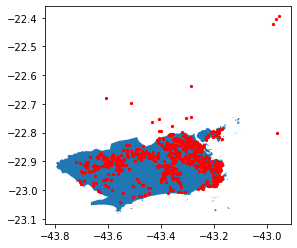

In [6]:
fig, ax = plt.subplots()
app.max_borders.plot(ax=ax)
app.events_data.sample(1000).plot(markersize=5, color='red', ax=ax)

# Time discretization

In [7]:
# 7 days in a week
app.add_time_discretization('D', 1, 7)

# 48 30-minute slots in a day
app.add_time_discretization('m', 30, 60*24)

In [8]:
# variable size slots of months in a year
app.add_time_discretization('M', [3, 6, 3], 12)

<AxesSubplot:xlabel='ts'>

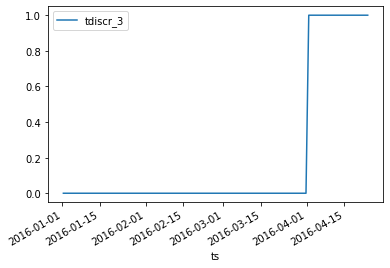

In [9]:
app.events_data.head(200).plot(kind='line', x='ts', y='tdiscr_3')

# Geographical discretization

## Rectangular

In [10]:
app.add_geo_discretization(
    discr_type='R',
    rect_discr_param_x=10,
    rect_discr_param_y=10
)
app.geo_discretization.head()

,id,neighbors,geometry,center_lat,center_lon
0,0,"[1, 6, 7]","POLYGON ((-43.66418 -23.04922, -43.65577 -23.0...",-4.854787e+06,-2.563147e+06
1,1,"[2, 0, 7, 8, 6]","POLYGON ((-43.65577 -23.05225, -43.65577 -23.0...",-4.850095e+06,-2.563099e+06
2,2,"[3, 1, 8, 9, 7]","MULTIPOLYGON (((-43.56902 -23.08148, -43.56886...",-4.843597e+06,-2.564048e+06
3,3,"[2, 9, 10, 8]","MULTIPOLYGON (((-43.51136 -23.06136, -43.51131...",-4.838224e+06,-2.564492e+06
4,4,"[5, 13, 12]","MULTIPOLYGON (((-43.20764 -23.08212, -43.20794...",-4.803046e+06,-2.565305e+06


<AxesSubplot:>

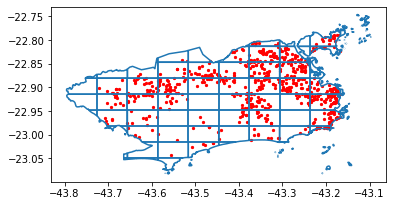

In [11]:
fig, ax = plt.subplots()
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)

## Hexagonal

In [12]:
app.add_geo_discretization(
    discr_type='H',
    hex_discr_param=6
)
app.geo_discretization.head()

,id,neighbors,geometry,center_lat,center_lon
0,0,"[17, 1, 2, 4]","POLYGON ((-43.57061 -22.83267, -43.55283 -22.8...",-4.845606e+06,-2.542313e+06
1,1,"[17, 9]","POLYGON ((-43.51279 -22.82121, -43.48808 -22.8...",-4.838890e+06,-2.540917e+06
2,2,"[17, 4, 29, 30, 32]","POLYGON ((-43.61121 -22.88048, -43.57565 -22.8...",-4.848643e+06,-2.547837e+06
3,3,"[19, 6, 25]","POLYGON ((-43.37167 -22.80665, -43.35858 -22.8...",-4.824265e+06,-2.539234e+06
4,4,"[2, 32, 18]","POLYGON ((-43.61492 -22.86140, -43.61121 -22.8...",-4.853195e+06,-2.543875e+06


<AxesSubplot:>

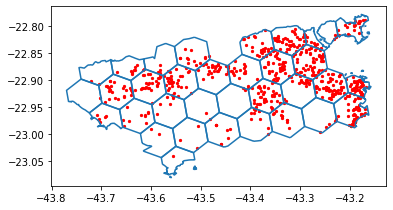

In [13]:
fig, ax = plt.subplots()
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)

## Custom

In [14]:
# custom map
custom_map = gpd.read_file(r'data\rio_de_janeiro_neighborhoods')
print(type(custom_map))
custom_map = custom_map.set_crs('epsg:29193')
custom_map.head()

<class 'geopandas.geodataframe.GeoDataFrame'>


,Área,NOME,REGIAO_ADM,AREA_PLANE,CODBAIRRO,CODRA,CODBNUM,LINK,area,len,geometry
0,1.705684e+06,Paquetá,PAQUETA,1,13,21,13,Paquetá&area=13,1.705684e+06,24841.426123,"MULTIPOLYGON (((694555.510 7483079.800, 694554..."
1,4.056403e+06,Freguesia,ILHA DO GOVERNADOR,3,98,20,98,Freguesia&area=98,4.056403e+06,18303.596291,"MULTIPOLYGON (((687736.110 7480093.850, 687735..."
2,9.780466e+05,Bancários,ILHA DO GOVERNADOR,3,97,20,97,Bancários&area=97,9.780466e+05,7758.781330,"MULTIPOLYGON (((685934.980 7479388.550, 685937..."
3,1.895742e+07,Galeão,ILHA DO GOVERNADOR,3,104,20,104,Galeão&area=104,1.895742e+07,21510.058418,"MULTIPOLYGON (((681940.940 7479375.300, 681947..."
4,1.672546e+06,Tauá,ILHA DO GOVERNADOR,3,101,20,101,Tauá&area=101,1.672546e+06,8246.109606,"POLYGON ((686812.130 7477581.700, 686796.080 7..."


In [15]:
app.add_geo_discretization('C', custom_data=custom_map)
app.geo_discretization.head()

,geometry,id,neighbors,center_lat,center_lon
0,"MULTIPOLYGON (((-43.10572 -22.74889, -43.10573...",0,[],-4.793761e+06,-2.531271e+06
1,"MULTIPOLYGON (((-43.17175 -22.77662, -43.17175...",1,[2],-4.800155e+06,-2.533544e+06
2,"MULTIPOLYGON (((-43.18920 -22.78319, -43.18918...",2,"[1, 4, 9]",-4.801518e+06,-2.534409e+06
3,"MULTIPOLYGON (((-43.22809 -22.78375, -43.22803...",3,"[5, 14]",-4.807678e+06,-2.536117e+06
4,"POLYGON ((-43.18044 -22.79941, -43.18060 -22.7...",4,"[2, 6, 9, 11]",-4.802147e+06,-2.534993e+06


<AxesSubplot:>

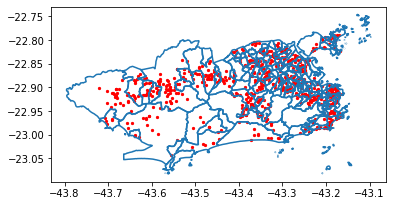

In [16]:
fig, ax = plt.subplots()
app.geo_discretization.boundary.plot(ax=ax)
app.events_data.sample(1000).dropna(subset=['gdiscr']).plot(markersize=5, color='red', ax=ax)

# Add geo located regressors

In [17]:
population = gpd.read_file(r'data\rio_de_janeiro_population')
population = population[['Pop1','Pop2','Pop3','Pop4','geometry']].copy()
population.head()

,Pop1,Pop2,Pop3,Pop4,geometry
0,1278.0,1240.0,2648.0,1556.0,"MULTIPOLYGON (((694555.510 7483079.800, 694554..."
1,13692.0,14914.0,31346.0,10559.0,"MULTIPOLYGON (((687736.110 7480093.850, 687735..."
2,2598.0,2903.0,5298.0,1713.0,"MULTIPOLYGON (((685934.980 7479388.550, 685937..."
3,6205.0,5608.0,9468.0,1690.0,"MULTIPOLYGON (((681940.940 7479375.300, 681947..."
4,6700.0,6862.0,12185.0,3820.0,"POLYGON ((686812.130 7477581.700, 686796.080 7..."


In [18]:
app.add_geo_features(population)

<AxesSubplot:>

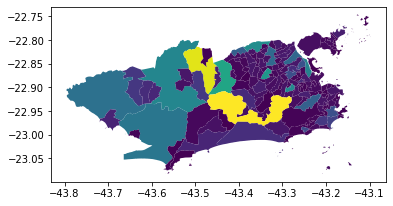

In [19]:
app.geo_discretization.plot(column='Pop1')

In [20]:
app.events_features, app.geo_features, app.time_indexes, app.geo_index

(['Prioridade'],
 ['Pop1', 'Pop2', 'Pop3', 'Pop4'],
 ['tdiscr_1', 'tdiscr_2', 'tdiscr_3'],
 'gdiscr')